In [2]:
#ZOMATO DATA ANALYSIS PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
data=pd.read_csv("Zomato data .csv")
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
data.isnull()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
data['rate']=data['rate'].apply(handlerate)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [13]:
#Types of resturants

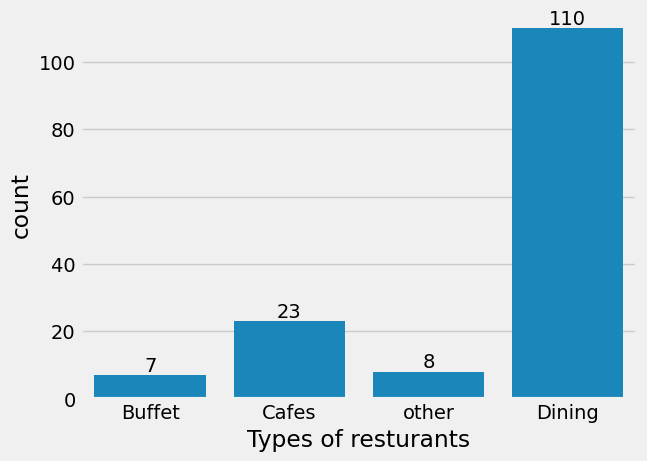

In [8]:
ax=sns.countplot(x='listed_in(type)',data=data)
plt.xlabel('Types of resturants')
for bars in ax.containers:
    ax.bar_label(bars)

In [15]:
#Conclusion:-Majority of customers orders from Dinning resturants.

In [9]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

Text(0.5, 0, 'Types of resturants')

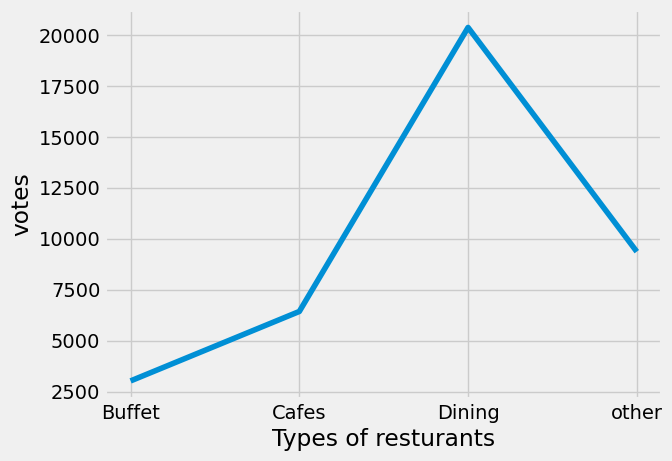

In [10]:
total_votes=data.groupby(['listed_in(type)'],as_index=False)['votes'].sum()
sns.lineplot(x='listed_in(type)',y='votes',data=total_votes)
plt.xlabel("Types of resturants")

In [29]:
#conclusion:-Dinning resturants has received majority of votes.

Text(0.5, 1.0, 'Rating distribution')

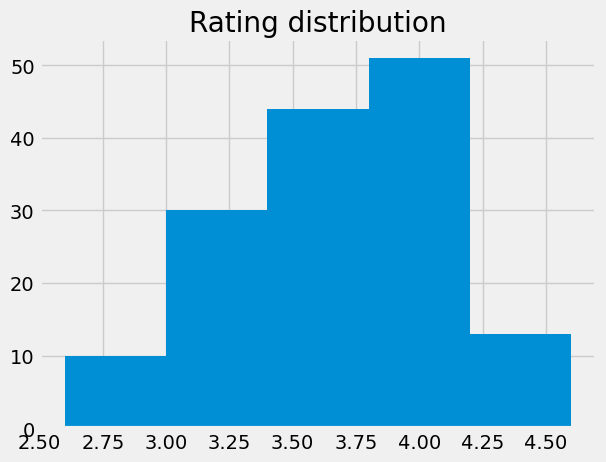

In [11]:
plt.hist(data['rate'],bins=5)
plt.title("Rating distribution")

In [12]:
#Conclusion:-Most customer gave rattings between 3.75 to 4.00.

In [13]:
#AVERAGE ORDER SPENDING BY COUPLES

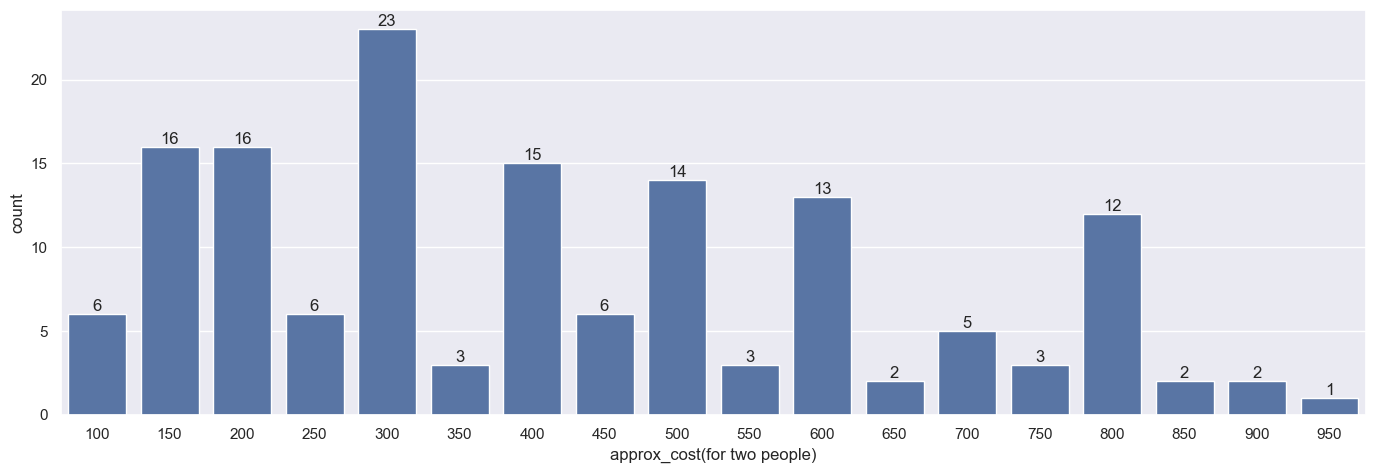

In [17]:
ax=sns.countplot(x='approx_cost(for two people)',data=data)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
#Conclusion:-Majority of couples prefer resturants with an approximate cost of 300 rupees.

In [ ]:
#Which mode(online and offline) of payment get more ratting

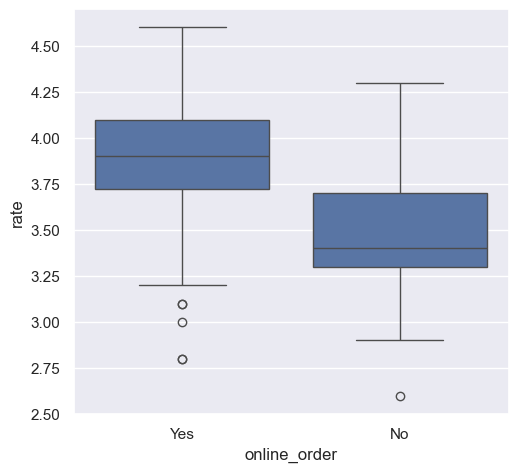

In [25]:
sns.boxplot(x='online_order',y='rate',data=data)
sns.set(rc={'figure.figsize':(5,5)})

In [26]:
#Conclusion:- online order receive higher rating in comparison to offline order.

In [27]:
#Which type of resturant received more offine orders?

Text(7.25, 0.5, 'Listed_in(type)')

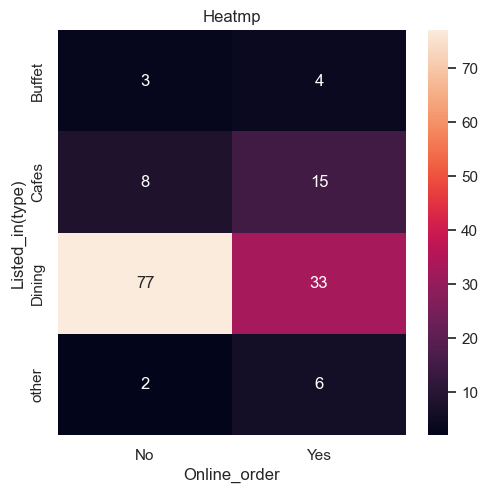

In [30]:
x=data.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(x,annot=True)
plt.title('Heatmp')
plt.xlabel('Online_order')
plt.ylabel('Listed_in(type)')

In [ ]:
#Conclusion:-
#Dinning resturants more accept offline orders where  cafe get more online orders.
#so customer prefers more offline orders in resturants but more online orders in cafe.